In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.preprocessing import compute_phases,reconstruct_trajectory_from_angles


In [2]:
R = 2.
w = 100.
v0 = 1.
A = 0.1
t = np.linspace(0,1,1000)
x = R * np.cos(w*t)
y = R * np.sin(w*t)
z = v0*t
id = np.ones(x.shape[0],dtype=float)

# Look at the helix without noise, and the associated phase space

In [3]:
df =pd.DataFrame(np.array([x,y,z,id,t]).T,columns=['x','y','z','label','frame'])

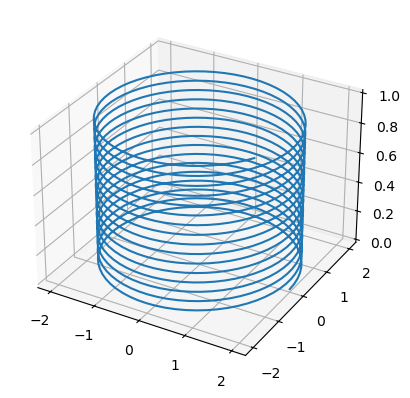

In [4]:
ax = plt.subplot(projection='3d')
ax.plot(df['x'],df['y'],df['z'])

Text(0, 0.5, 'curvature angle')

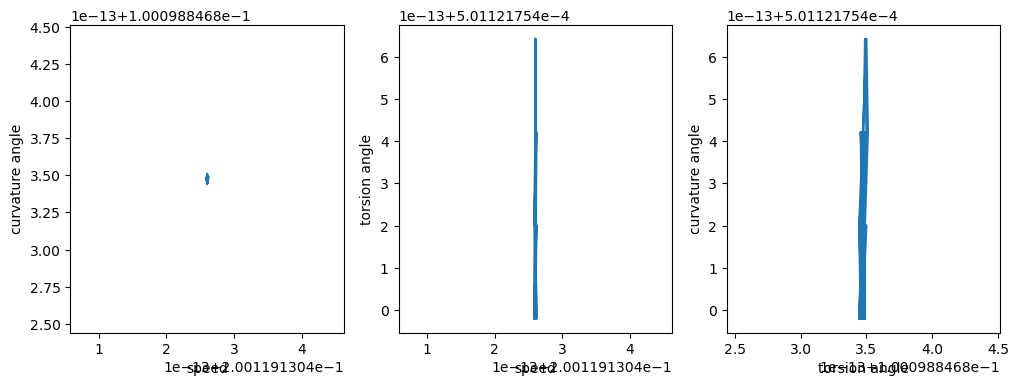

In [5]:
df = compute_phases(df,groupby="label")
tmax = 100
fig,ax = plt.subplots(ncols=3,figsize=(12,4))
ax[0].plot(df['speed'][:tmax],df['curvature_angle'][:tmax])
ax[0].set_xlabel('speed')
ax[0].set_ylabel('curvature angle')

ax[1].plot(df['speed'][:tmax],df['torsion_angle'][:tmax])
ax[1].set_xlabel('speed')
ax[1].set_ylabel('torsion angle')

ax[2].plot(df['curvature_angle'][:tmax],df['torsion_angle'][:tmax])
ax[2].set_xlabel('torsion angle')
ax[2].set_ylabel('curvature angle')

In [6]:
features = np.array([df['speed'].values,df['curvature_angle'].values,df['torsion_angle'].values],dtype=float).T

# test the reconstruction

3


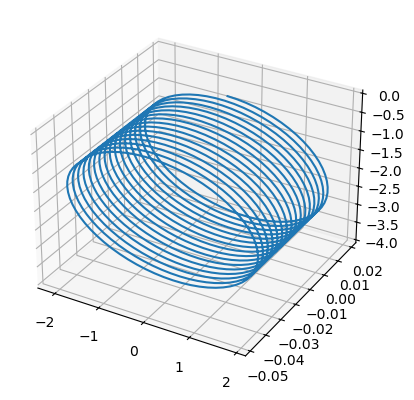

In [7]:
traj = reconstruct_trajectory_from_angles(features=features)
ax = plt.subplot(projection='3d')
ax.plot(traj[:,0],traj[:,1],traj[:,2])

2


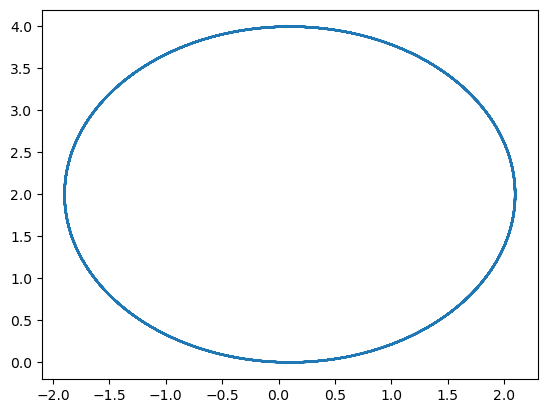

In [10]:
traj = reconstruct_trajectory_from_angles(features=features[:,:2])
ax = plt.subplot()
ax.plot(traj[:,0],traj[:,1])

In [10]:
features.shape[1]

3

# add noise, and look at the impact in term of angular velocity and torsion angle

In [8]:
rdx,rdy,rdz = np.random.randint(0,1000,df['x'].shape[0])/1000 * A,np.random.randint(0,1000,df['y'].shape[0])/1000 * A,np.random.randint(0,1000,df['z'].shape[0])/1000 * A
df['x']+= rdx
df['y'] +=rdy
df['z']+=rdz

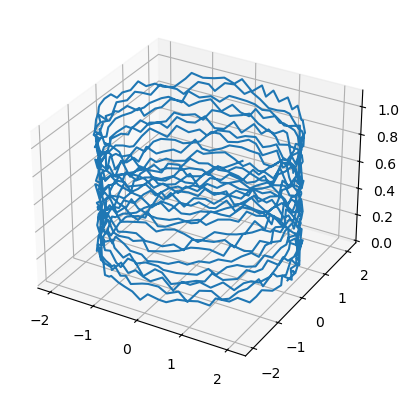

In [9]:
ax = plt.subplot(projection='3d')
ax.plot(df['x'],df['y'],df['z'])

Text(0, 0.5, 'curvature angle')

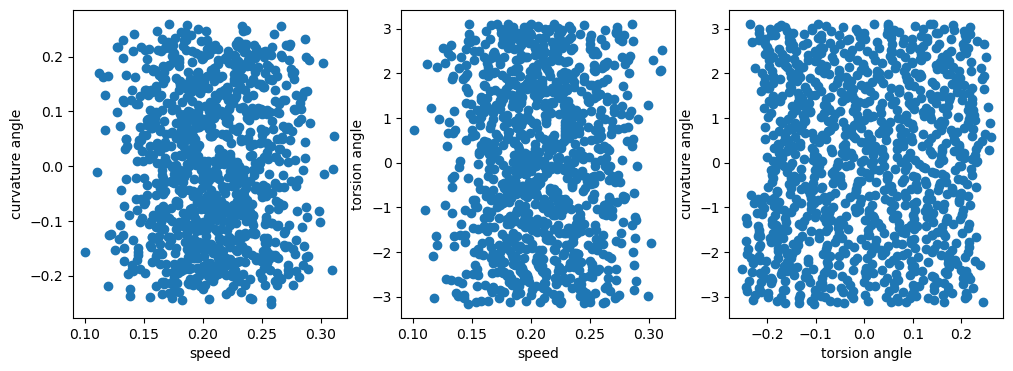

In [11]:
df = compute_phases(df,groupby="label",window=1)
fig,ax = plt.subplots(ncols=3,figsize=(12,4))
ax[0].scatter(df['speed'],df['theta'])
ax[0].set_xlabel('speed')
ax[0].set_ylabel('curvature angle')
#ax[0].plot([mspeed,mspeed],[np.min(df['curvature_angle']),np.max(df['curvature_angle'])],color='red')
#ax[0].plot([np.min(df['speed']),np.max(df['speed'])],[mcurvature,mcurvature],color='red')

ax[1].scatter(df['speed'],df['phi'])
ax[1].set_xlabel('speed')
ax[1].set_ylabel('torsion angle')
#ax[1].plot([mspeed,mspeed],[np.min(df['torsion_angle']),np.max(df['torsion_angle'])],color='red')
#ax[1].plot([np.min(df['speed']),np.max(df['speed'])],[mtorsion,mtorsion],color='red')

ax[2].scatter(df['theta'],df['phi'])
ax[2].set_xlabel('torsion angle')
ax[2].set_ylabel('curvature angle')
#ax[2].plot([mtorsion,mtorsion],[np.min(df['curvature_angle']),np.max(df['curvature_angle'])],color='red')
#ax[2].plot([np.min(df['torsion_angle']),np.max(df['torsion_angle'])],[mcurvature,mcurvature],color='red')

# now filters the trajectory and see what we recover

In [12]:
columns=['x','y','z']
groupby = 'label'

window = 7
polyorder=3

for col in columns:
    df[col] = (
        df.groupby(groupby)[col]
        .transform(lambda x: savgol_filter(x, window_length=window, polyorder=polyorder, mode="interp"))
    )

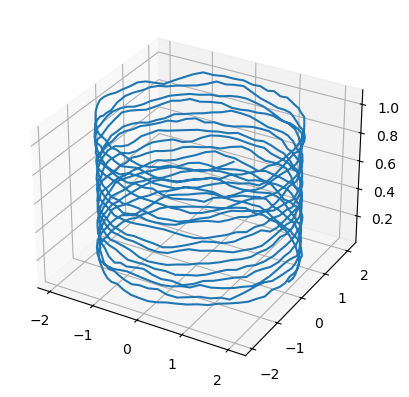

In [13]:
ax = plt.subplot(projection='3d')
ax.plot(df['x'],df['y'],df['z'])

Text(0, 0.5, 'curvature angle')

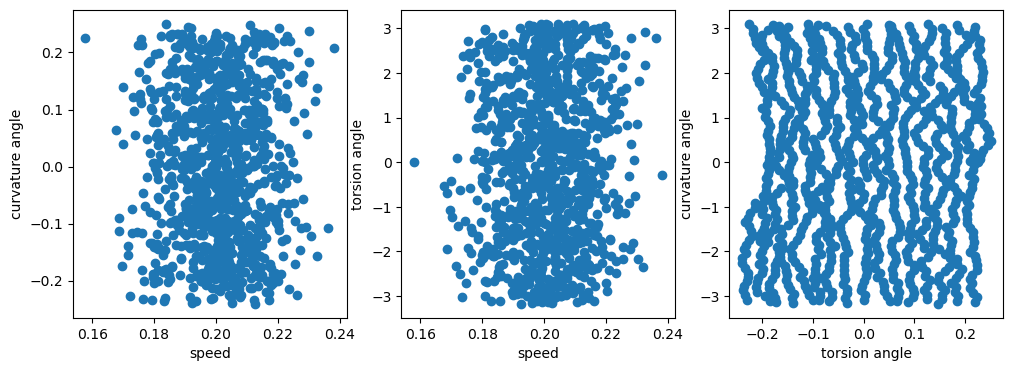

In [15]:
df = compute_phases(df,groupby="label",window=1)
fig,ax = plt.subplots(ncols=3,figsize=(12,4))
ax[0].scatter(df['speed'],df['theta'])
ax[0].set_xlabel('speed')
ax[0].set_ylabel('curvature angle')
#ax[0].plot([mspeed,mspeed],[np.min(df['curvature_angle']),np.max(df['curvature_angle'])],color='red')
#ax[0].plot([np.min(df['speed']),np.max(df['speed'])],[mcurvature,mcurvature],color='red')

ax[1].scatter(df['speed'],df['phi'])
ax[1].set_xlabel('speed')
ax[1].set_ylabel('torsion angle')
#ax[1].plot([mspeed,mspeed],[np.min(df['torsion_angle']),np.max(df['torsion_angle'])],color='red')
#ax[1].plot([np.min(df['speed']),np.max(df['speed'])],[mtorsion,mtorsion],color='red')

ax[2].scatter(df['theta'],df['phi'])
ax[2].set_xlabel('torsion angle')
ax[2].set_ylabel('curvature angle')
#ax[2].plot([mtorsion,mtorsion],[np.min(df['curvature_angle']),np.max(df['curvature_angle'])],color='red')
#ax[2].plot([np.min(df['torsion_angle']),np.max(df['torsion_angle'])],[mcurvature,mcurvature],color='red')